<a href="https://colab.research.google.com/github/KaimwenK/MKT-440-of-Wen/blob/main/Group_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install snscrape


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from datetime import date
import snscrape.modules.twitter as sntwitter
import pandas as pd
import numpy as np
from textblob import TextBlob
from wordcloud import WordCloud
import re
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import nltk
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
import spacy
nlp = spacy.load("en_core_web_sm")

In [3]:
# Create a list to append tweet data
tweets_list = []
maxTweets = 1000
# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('crypto since:2020-01-01 until:{today}').get_items()):
    if i>maxTweets:
        break
    tweets_list.append([tweet.content])
    
# Creating a dataframe from the tweets list above
tweets_to_df = pd.DataFrame(tweets_list, columns=['Tweets'])

In [4]:
tweets_to_df.head() #lists first five tweets

,Tweets
0,@DGretta_Author Never heard of the word “polyc...
1,It took me until today to take my crypto off t...
2,"Not until today, nothing has pained me more ab..."
3,@noluyoarkadsm @NY2LV22 @Amfernandes84 @Bitcoi...
4,@STC_BTC @shakepay @kucoincom @cryptocom I onl...


In [5]:
#clean the tweets with a function
def cleanTweets(text):
    text = re.sub('@[A-Za-z0-9_]+', '', text) #removes @mentions
    text = re.sub('#','',text) #removes hastag '#' symbol
    text = re.sub('RT[\s]+','',text)
    text = re.sub('https?:\/\/\S+', '', text) 
    text = re.sub('\n',' ',text)
    return text
tweets_to_df['cleanedTweets'] = tweets_to_df['Tweets'].apply(cleanTweets) #apply cleanTweet function to the tweet
tweets_to_df.head() #compares original tweets with cleaned Tweets

,Tweets,cleanedTweets
0,@DGretta_Author Never heard of the word “polyc...,Never heard of the word “polycule” until toda...
1,It took me until today to take my crypto off t...,It took me until today to take my crypto off t...
2,"Not until today, nothing has pained me more ab...","Not until today, nothing has pained me more ab..."
3,@noluyoarkadsm @NY2LV22 @Amfernandes84 @Bitcoi...,"Nope, NFT are, and if you can’t understan..."
4,@STC_BTC @shakepay @kucoincom @cryptocom I onl...,I only have an account because a friend of...


In [6]:
tweets_to_df.to_csv('tweets_crypto.csv') #write dataframe into csv file
savedTweets = pd.read_csv('tweets_crypto.csv',index_col=0) #reads csv file

In [7]:
#get subjectivity and polarity of tweets with a function
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
#get polarity with a function
def getPolarity(text):
    return TextBlob(text).sentiment.polarity
savedTweets['Subjectivity'] = savedTweets['cleanedTweets'].apply(getSubjectivity)
savedTweets['Polarity'] = savedTweets['cleanedTweets'].apply(getPolarity)
savedTweets.drop('Tweets', axis=1).head() #shows polarity and subjectivity of each tweet and drops the uncleaned tweets column


,cleanedTweets,Subjectivity,Polarity
0,Never heard of the word “polycule” until toda...,0.000000,0.000000
1,It took me until today to take my crypto off t...,0.000000,0.000000
2,"Not until today, nothing has pained me more ab...",0.522222,0.122222
3,"Nope, NFT are, and if you can’t understan...",0.666667,-0.500000
4,I only have an account because a friend of...,0.373333,0.120000


In [8]:
#create a function to check negative, neutral and positive analysis
def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score ==0:
        return 'Neutral'
    else:
        return 'Positive'
    
savedTweets['Analysis'] = savedTweets['Polarity'].apply(getAnalysis)

In [9]:
savedTweets['Analysis'].value_counts() #shows the counts of tweets' polarity

Positive    592
Neutral     216
Negative    193
Name: Analysis, dtype: int64

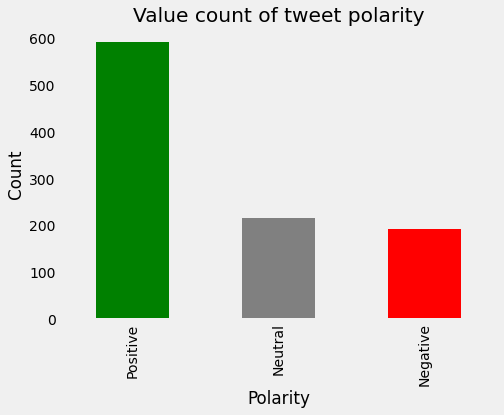

In [10]:
#plot a bar graph to show count of tweet sentiment
fig = plt.figure(figsize=(7,5))
color = ['green','grey','red']
savedTweets['Analysis'].value_counts().plot(kind='bar',color = color)
plt.title('Value count of tweet polarity')
plt.ylabel('Count')
plt.xlabel('Polarity')
plt.grid(False)
plt.show()

Text(0.5, 1.0, 'Distribution of polarity')

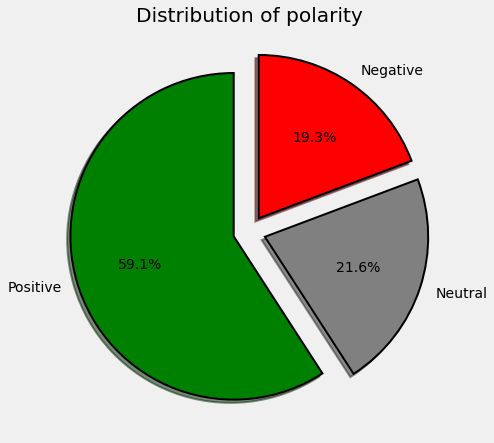

In [11]:
#pie chart to show percentage distribution of polarity
fig = plt.figure(figsize=(7,7))
colors = ('green', 'grey', 'red')
wp={'linewidth':2, 'edgecolor': 'black'}
tags=savedTweets['Analysis'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors=colors, 
         startangle=90, wedgeprops=wp, explode=explode, label='')
plt.title('Distribution of polarity')

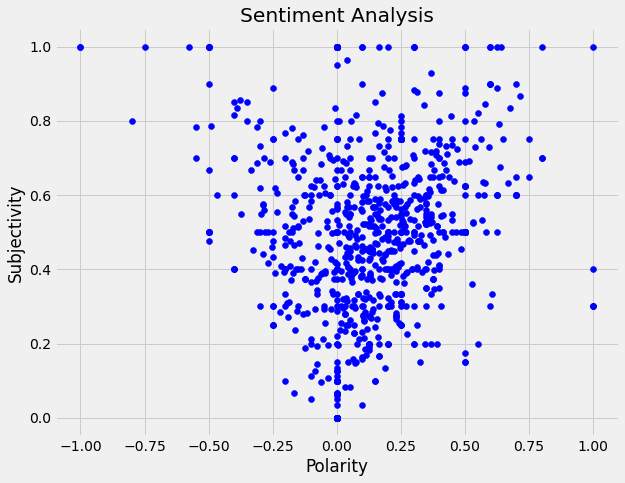

In [12]:
#plot the polarity and subjectivity on a scatter plot
plt.figure(figsize=(9,7))
for i in range(0,savedTweets.shape[0]):
    plt.scatter(savedTweets['Polarity'][i],savedTweets['Subjectivity'][i], color='blue')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

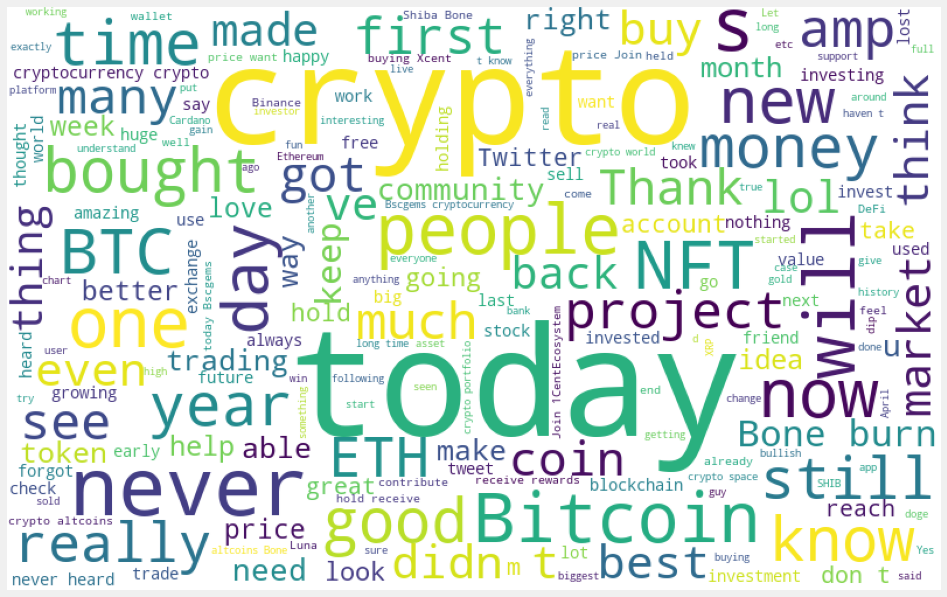

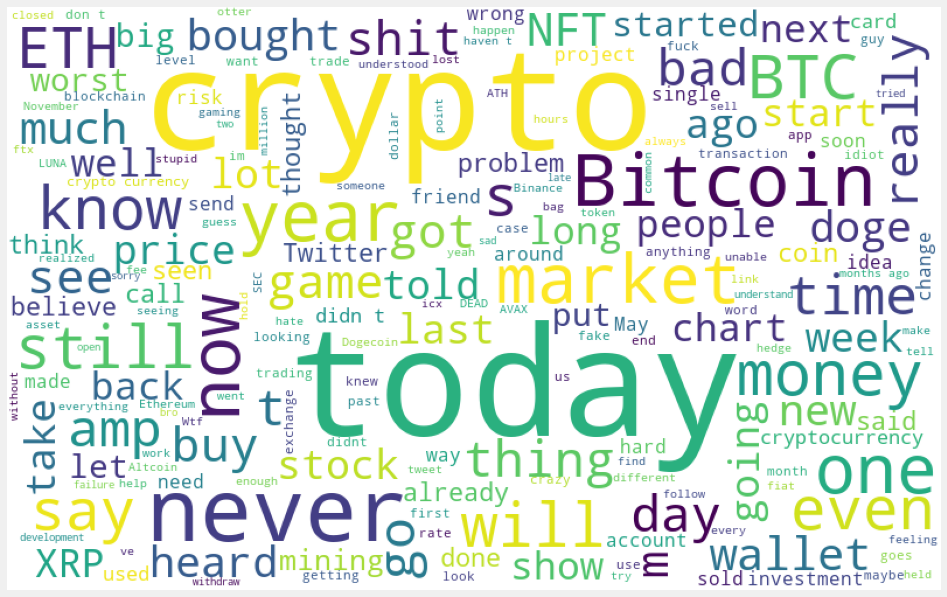

In [13]:
#create a function for wordcloud
def create_wordcloud(text):    
    allWords = ' '.join([tweets for tweets in text])
    wordCloud = WordCloud(background_color='white', width=800, height=500, random_state=21, max_font_size=130).generate(allWords)
    plt.figure(figsize=(20,10))
    plt.imshow(wordCloud)
    plt.axis('off')
    plt.show()
#wordcloud for positive tweets
posTweets = savedTweets.loc[savedTweets['Analysis']=='Positive', 'cleanedTweets']
create_wordcloud(posTweets)
#wordcloud for negative tweets
negTweets = savedTweets.loc[savedTweets['Analysis']=='Negative', 'cleanedTweets']
create_wordcloud(negTweets)
